# **Installing modules**

Before giving data to the model for prediction, we need to preprocess the data to transform the input image so that the image has the right shape and other characteristics like mean and standard deviation. This values should be similar to the ones which where use while training the model making sure the network will produce meaningful answer and the right prediction.

In [ ]:
!pip uninstall torch torchvision -y
!pip install torch torchvision --index-url https://download.pytorch.org/whl/cu121


Found existing installation: torch 2.5.1+cu121
Uninstalling torch-2.5.1+cu121:
  Successfully uninstalled torch-2.5.1+cu121
Found existing installation: torchvision 0.20.1+cu121
Uninstalling torchvision-0.20.1+cu121:
  Successfully uninstalled torchvision-0.20.1+cu121
Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.4/780.4 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 108.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 87.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 105.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
!pip install torch torchvision --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu


# Advantages of Transfer Learning

- **Improve Baseline Performance:** When we augment the knowledge of an isolated learner with knowledge from a pretrained model, the baseline performance might improve due to this knkowledge transfer.

- **Improved final performance:** Higher final perfomance might be attained by leveraging transfer learning.


- **Model-development time:** Utilizing knowledge from a pretrained model helps in fully learning the target task, as compared to a target model that learns from scratch. This, in turn, results in improvements in the overall time taken to develop/learn a model.


**Transfer Learning Types**:


- **Fine-tuning** the Pre-trained Model


- Pre-trained Model as **Fixed Feature Extractor**

**Fine-tuning the Pre-trained Model:** In fine-tuning, replace the final fully connected layer for classification of pre-trained model. Not only reset the final layer but also fine-tune the weights of the pretrained network by continuing the backpropagation.It is possible to fine-tune all the layers of the pre-trained model, or it's possible to keep some of the earlier layers fixed due to overfitting concerns and only fine-tune some higher-level portion of the network.

**Pre-trained Model as Fixed Feature Extractor:** The last fully connected layer is replaced with a new one with random weights and only this layer is trained. Here, we will freeze the weights for all of the network except that of the final fully connected layer. So, remove the last fully-connected layer, then treat the rest of the network as a fixed feature extractor for the new dataset.

# Set Up Kaggle API Connection and Fetch Data


In [ ]:
# Step 1: Install the Kaggle API
# The Kaggle API is used to fetch datasets directly from Kaggle.
!pip install kaggle --upgrade

# Step 2: Authenticate the Kaggle API
# This requires a kaggle.json file, which contains your API key.
import os

# Define the path to your kaggle.json file
kaggle_json_path = "/content/kaggle.json"  # Path where kaggle.json is stored
destination = "~/.kaggle/"  # The directory where Kaggle expects the file

# Copy kaggle.json to the appropriate directory
os.makedirs(os.path.expanduser(destination), exist_ok=True)  # Ensure the directory exists
!cp {kaggle_json_path} {destination}  # Copy the kaggle.json file to ~/.kaggle/

# Set appropriate file permissions
!chmod 600 ~/.kaggle/kaggle.json  # Ensure only the user can read and write the file
print("Kaggle API authenticated successfully.")

import os
import shutil

# Step 3: Delete the old dataset folder if it exists
data_dir = "/content/asl_dataset"
if os.path.exists(data_dir):
    shutil.rmtree(data_dir)  # Remove the folder and all its contents
    print("Old dataset deleted.")

# Step 4: Download the dataset using the Kaggle API
# The dataset is fetched and extracted directly to the specified directory.

# Define the Kaggle dataset ID
dataset_id = "ayuraj/asl-dataset"  # This is the unique identifier for the dataset on Kaggle

# Define the directory where the dataset will be extracted
output_dir = "/content/asl_dataset"

# Use the Kaggle API to download and extract the dataset
!kaggle datasets download -d {dataset_id} -p {output_dir} --unzip

# Print confirmation
print(f"Dataset downloaded and extracted to {output_dir}")




cp: cannot stat '/content/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Kaggle API authenticated successfully.
Dataset URL: https://www.kaggle.com/datasets/ayuraj/asl-dataset
License(s): CC0-1.0
 86% 49.0M/56.9M [00:00<00:00, 80.5MB/s]
100% 56.9M/56.9M [00:00<00:00, 88.5MB/s]
Dataset downloaded and extracted to /content/asl_dataset


# Loading and Preprocessing the ASL Dataset

- The ASL dataset is organized into folders named `0-9` and `a-z`, each containing images of hand gestures corresponding to those labels. We'll use these folders to load images, preprocess them (resize to 28x28 pixels, convert to grayscale, and normalize pixel values), and split them into training, validation, and testing datasets.

**Data Augmentation:**
In the provided code, data loading and augmentation are handled systematically to prepare the dataset for robust training. The `ASLDataset` class is responsible for loading images from the dataset directory, converting them into grayscale, and storing them along with their corresponding labels. Each image is preprocessed using a transformation pipeline defined by the `torchvision.transforms` module. Data augmentation is applied to the training set via the `train_transform` pipeline, which includes techniques such as random rotations, horizontal flips, and affine transformations. These augmentations introduce variability to the training data, simulating real-world inconsistencies and helping the model learn generalized patterns rather than overfitting to specific features in the original dataset. Validation and testing datasets are kept consistent with only resizing and normalization applied, ensuring that the evaluation reflects the model's ability to generalize to unseen, non-augmented data.

Data augmentation is critical before training as it addresses common issues like overfitting and improves the model's robustness by exposing it to a wider range of variations in the data. In real-world scenarios, datasets often have inconsistencies due to differences in lighting, orientation, or resolution. Augmentation artificially creates new training samples by applying these transformations, effectively increasing the diversity of the training set without requiring additional data collection. This ensures that the model does not become overly reliant on specific features present in the original dataset, leading to better generalization and improved performance on unseen data. By augmenting only the training set while keeping validation and test sets unchanged, the pipeline ensures a fair evaluation of the model's generalization capabilities.

Training set size: 1760
Validation set size: 377
Test set size: 378


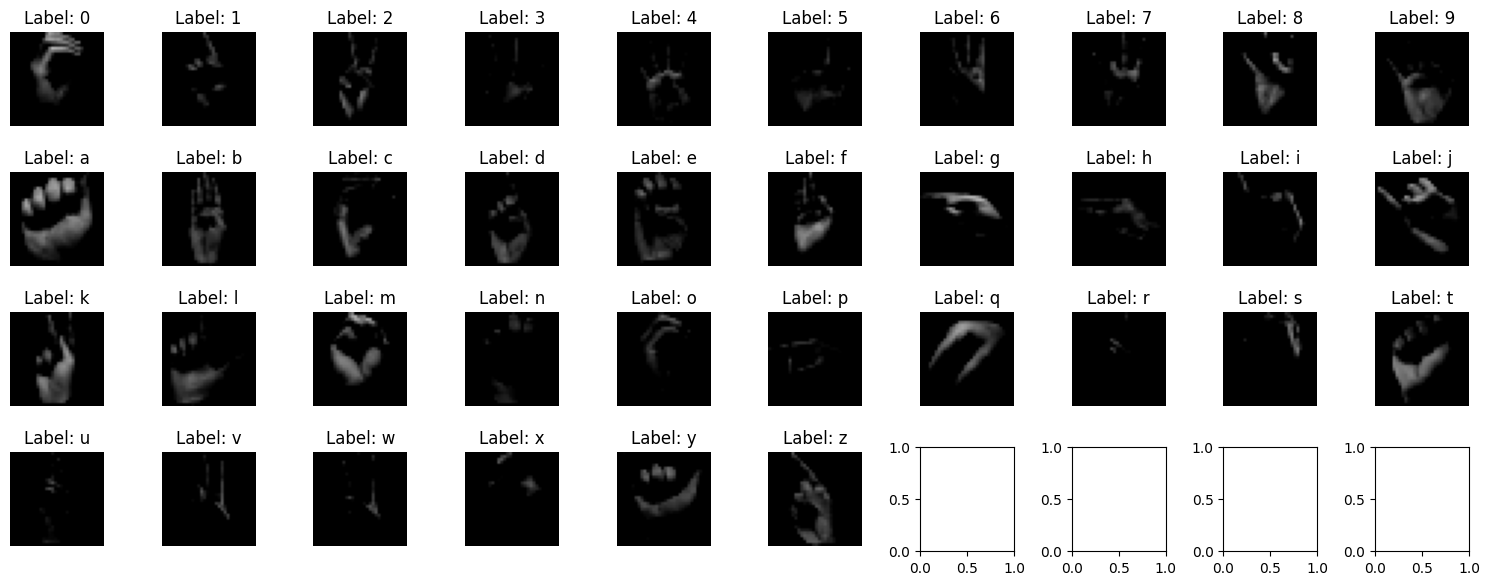

In [ ]:
import os
import numpy as np
from PIL import Image
from torch.utils.data import Dataset, DataLoader, random_split
import torch
from torchvision import transforms
import matplotlib.pyplot as plt

# Step 1: Define a Custom Dataset Class
class ASLDataset(Dataset):
    """
    A custom dataset class for loading the ASL dataset, which consists of folders
    named 0-9 and a-z containing images for each class.
    """
    def __init__(self, data_dir, classes, transform=None):
        """
        Initializes the dataset by loading all images and their labels.

        Args:
        - data_dir (str): Directory containing the ASL dataset.
        - classes (list): List of class folder names (e.g., ['0', '1', ..., 'a', ..., 'z']).
        - transform (callable, optional): Transformations to apply to each image.
        """
        self.data = []  # List to store image data
        self.labels = []  # List to store corresponding labels
        self.transform = transform

        for label, class_name in enumerate(classes):
            folder_path = os.path.join(data_dir, class_name)
            if os.path.isdir(folder_path):  # Check if the folder exists
                for file_name in os.listdir(folder_path):
                    file_path = os.path.join(folder_path, file_name)
                    if os.path.isfile(file_path):  # Ensure it's a file
                        try:
                            img = Image.open(file_path).convert("L")  # Convert to grayscale
                            self.data.append(img)  # Store the image
                            self.labels.append(label)  # Store the label
                        except Exception as e:
                            print(f"Error loading image {file_path}: {e}")
            else:
                print(f"Warning: Class folder {class_name} is missing.")

    def __len__(self):
        """Returns the total number of images in the dataset."""
        return len(self.data)

    def __getitem__(self, idx):
        """
        Fetches an image and its label at a specific index.

        Args:
        - idx (int): Index of the image-label pair.

        Returns:
        - Transformed image (Tensor).
        - Label (int).
        """
        image = self.data[idx]
        label = self.labels[idx]

        if self.transform:  # Apply transformations if specified
            image = self.transform(image)

        return image, label

# Step 2: Set Dataset Paths and Parameters
data_dir = "/content/asl_dataset/asl_dataset"  # Directory containing dataset
classes = list(map(str, range(10))) + list("abcdefghijklmnopqrstuvwxyz")  # Class folder names


# Define transformations for data augmentation
train_transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize all images to 32x32 pixels
    transforms.Grayscale(num_output_channels=3),  # Convert grayscale to 3 channels (RGB)
    transforms.ColorJitter(brightness=0.2, contrast=0.2),  # Apply random brightness and contrast adjustments
    transforms.RandomRotation(15),  # Apply random rotations up to 15 degrees
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Apply random translations
    transforms.ToTensor(),  # Convert image to tensor and normalize to [0, 1]
    transforms.Normalize((0.5,), (0.5,))  # Normalize with mean=0.5, std=0.5
])



# Define transformations for validation and testing (no augmentation)
test_transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize all images to 32x32 pixels
    transforms.Grayscale(num_output_channels=3),  # Convert grayscale to 3 channels (RGB)
    transforms.ToTensor(),  # Convert image to tensor and normalize to [0, 1]
    transforms.Normalize((0.5,), (0.5,))  # Normalize with mean=0.5, std=0.5
])

# Step 3: Create the Dataset
asl_dataset = ASLDataset(data_dir, classes, transform=None)

# Step 4: Split Dataset into Train, Validation, and Test Sets
train_size = int(0.7 * len(asl_dataset))  # 70% for training
valid_size = int(0.15 * len(asl_dataset))  # 15% for validation
test_size = len(asl_dataset) - train_size - valid_size  # Remaining 15% for testing

# Randomly split the dataset
train_dataset, valid_dataset, test_dataset = random_split(
    asl_dataset, [train_size, valid_size, test_size], generator=torch.Generator().manual_seed(42)
)

# Apply different transformations to training and testing datasets
train_dataset.dataset.transform = train_transform  # Augmentation applied to training data
valid_dataset.dataset.transform = test_transform  # No augmentation for validation
test_dataset.dataset.transform = test_transform  # No augmentation for testing

# Step 5: Create DataLoaders
batch_size = 64  # Number of samples per batch
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)  # Shuffle for randomness
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Step 6: Verify Dataset Sizes
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(valid_dataset)}")
print(f"Test set size: {len(test_dataset)}")

# Step 7: Visualize All Classes (for reference, with test transform)
def visualize_all_classes(dataset, classes, transform=None):
    """
    Visualizes one sample from each class in the dataset.

    Args:
    - dataset (Dataset): The custom dataset containing ASL data.
    - classes (list): List of class names corresponding to labels.
    - transform (callable, optional): Transformations to apply to the images.
    """
    samples_per_class = {}
    for i in range(len(dataset)):
        image, label = dataset[i]
        if label not in samples_per_class:
            samples_per_class[label] = image
        if len(samples_per_class) == len(classes):
            break

    # Plot one sample for each class
    n_rows = 4
    n_cols = 10
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6))
    axes = axes.flatten()

    for idx, (label, image) in enumerate(samples_per_class.items()):
        # Convert tensor to NumPy and transpose for RGB channels
        image_np = image.permute(1, 2, 0).numpy()  # From (C, H, W) to (H, W, C)
        ax = axes[idx]
        ax.imshow(image_np)
        ax.set_title(f"Label: {classes[label]}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()


# Visualize all classes (using test transform)
visualize_all_classes(asl_dataset, classes, transform=test_transform)


# Building the Neural Network


**Building The Models Arquitecture**

The architecture for the ASL classification task adopts a **Convolutional Neural Network (CNN)**, designed to process the spatial relationships inherent in image data effectively. This change ensures the model excels in recognizing patterns and features necessary to classify 36 distinct classes (digits 0–9 and letters a–z) with greater accuracy and efficiency.


**Convolutional and Pooling Layers**

**Input Handling:** The input images, resized to 32x32 pixels with 3 color channels (RGB), are passed directly into the convolutional layers, preserving the 2D spatial structure. This allows the model to capture spatial hierarchies in the data, which is essential for image classification tasks.

**First Convolutional Layer:** The first convolutional layer applies 32 filters with a kernel size of 3x3 and stride 1. A padding of 1 ensures the spatial dimensions remain unchanged after convolution, preserving the 32x32 input size. The ReLU activation introduces non-linearity, enabling the model to learn complex patterns such as edges and corners.

    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)

**First Pooling Layer:** A max-pooling operation with a kernel size of 2x2 and a stride of 2 reduces the spatial dimensions from 32x32 to 16x16. This operation down-samples the feature maps, focusing on the most prominent features, reducing computational overhead, and minimizing overfitting.

    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

**Second Convolutional Layer:** The second convolutional layer applies 64 filters, doubling the number of feature maps to capture more intricate patterns. The kernel size and padding remain the same as the first layer, ensuring the features extracted build on those identified by the previous layer.

    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)

**Second Pooling Layer:** Another pooling operation reduces the spatial dimensions from 16x16 to 8x8, focusing on higher-level features and further compressing the data.

    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

**Third Convolutional Layer:** A third convolutional layer applies 128 filters to the 8x8 feature maps. This layer extracts abstract, high-level features critical for distinguishing between the 36 classes.

    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)

**Fully Connected Layers**

**Flattening the Data:** Before the features are passed into the fully connected layers, the 3D tensor output from the final convolutional layer (8x8x128) is flattened into a 1D vector (128 * 8 * 8 = 8192 features). This step bridges the transition from convolutional layers to fully connected layers.

    x = x.view(x.size(0), -1)  # Reshape to (batch_size, 128 * 8 * 8)

**First Fully Connected Layer:** The first fully connected layer reduces the flattened features to 128 neurons. This layer serves as a dense representation of the learned patterns and captures global relationships between features.

    self.fc1 = nn.Linear(128 * 8 * 8, 128)

**Second Fully Connected Layer:** The second fully connected layer further refines the feature representations by reducing the dimensionality to 64 neurons. This step introduces a bottleneck, emphasizing only the most significant features and reducing overfitting.

    self.fc2 = nn.Linear(128, 64)

**Output Layer:** The final layer outputs 36 logits, each corresponding to one of the ASL classes. During training, the softmax function (via CrossEntropyLoss) converts these logits into class probabilities, enabling the model to classify each input image.

    self.fc3 = nn.Linear(64, 36)

**Regularization with Dropout**

To prevent overfitting, dropout is applied after the first fully connected layer. By randomly deactivating 50% of the neurons during training, the model learns robust and generalized features.

    self.dropout = nn.Dropout(0.5)



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

# Define the CNN model for ASL classification
class ASLClassifierCNN(nn.Module):
    """
    A deeper convolutional neural network for classifying American Sign Language images.
    """
    def __init__(self):
        super(ASLClassifierCNN, self).__init__()

        # First convolutional layer
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)  # 3 input channels (RGB), 32 filters
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling reduces dimensions

        # Second convolutional layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)  # 64 filters
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling reduces dimensions further

        # Third convolutional layer
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)  # 128 filters
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling reduces dimensions further

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 4 * 4, 128)  # Input flattened to (128 channels x 4x4 size)
        self.fc2 = nn.Linear(128, 64)  # Intermediate layer
        self.fc3 = nn.Linear(64, 36)  # 36 output classes (digits 0-9 + letters a-z)

        # Dropout for regularization
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        """
        Forward pass defines how input data flows through the model.
        """
        # Convolutional layers with ReLU and max pooling
        x = F.relu(self.conv1(x))
        x = self.pool1(x)

        x = F.relu(self.conv2(x))
        x = self.pool2(x)

        x = F.relu(self.conv3(x))
        x = self.pool3(x)

        # Flatten the tensor for the fully connected layers
        x = x.view(x.size(0), -1)

        # Fully connected layers with ReLU activation and dropout
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  # Output layer (no activation; applied in loss function)

        return x



# Step 1: Initialize the updated model
model = ASLClassifierCNN()

print(model)


ASLClassifierCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=36, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [ ]:
# Ensure the model is on the appropriate device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Step 2: Print the model architecture using torchsummary
summary(model, (3, 32, 32), device=str(device))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
         MaxPool2d-2           [-1, 32, 16, 16]               0
            Conv2d-3           [-1, 64, 16, 16]          18,496
         MaxPool2d-4             [-1, 64, 8, 8]               0
            Conv2d-5            [-1, 128, 8, 8]          73,856
         MaxPool2d-6            [-1, 128, 4, 4]               0
            Linear-7                  [-1, 128]         262,272
           Dropout-8                  [-1, 128]               0
            Linear-9                   [-1, 64]           8,256
           Linear-10                   [-1, 36]           2,340
Total params: 366,116
Trainable params: 366,116
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.55
Params size (MB): 1.40
Estimated T

**Training the model we just Created**

In [ ]:
import torch.optim as optim  # Import the optimizer module
# Step 2: Define the Loss Function
# CrossEntropyLoss is used for multi-class classification problems.
# It combines log softmax and negative log likelihood loss into one.
criterion = nn.CrossEntropyLoss()

# Step 3: Define the Optimizer with L2 Regularization (Weight Decay) <- this are the regularizations for our mahcine learning model
# Weight decay controls the strength of the L2 regularization
# Adam optimizer is used as it adapts the learning rate dynamically and converges faster.
# Use a slightly higher learning rate
optimizer = optim.Adam(model.parameters(), lr=0.002, weight_decay=1e-4)

# Step 4: Set Device (GPU or CPU)
# Use GPU if available for faster training.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Step 5: Train the Model
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

def train_model(model, train_loader, valid_loader, criterion, optimizer, epochs=10):
    # Add a learning rate scheduler
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)  # Decay by 50% every 5 epochs

    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        correct_train = 0
        total_train = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_loss /= len(train_loader)
        train_accuracy = 100 * correct_train / total_train

        # Validation phase
        model.eval()
        valid_loss = 0.0
        correct_valid = 0
        total_valid = 0

        with torch.no_grad():
            for images, labels in valid_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                valid_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total_valid += labels.size(0)
                correct_valid += (predicted == labels).sum().item()

        valid_loss /= len(valid_loader)
        valid_accuracy = 100 * correct_valid / total_valid

        # Adjust learning rate
        scheduler.step()

        # Save metrics
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
        train_accuracies.append(train_accuracy)
        valid_accuracies.append(valid_accuracy)

        print(f"Epoch {epoch+1}/{epochs} -> Training Loss: {train_loss:.4f}, Validation Loss: {valid_loss:.4f}, "
              f"Training Accuracy: {train_accuracy:.2f}%, Validation Accuracy: {valid_accuracy:.2f}%")




# Train the model
train_model(model, train_loader, valid_loader, criterion, optimizer, epochs=10)

Epoch 1/10 -> Training Loss: 3.5892, Validation Loss: 3.5857, Training Accuracy: 2.61%, Validation Accuracy: 5.31%
Epoch 2/10 -> Training Loss: 3.3727, Validation Loss: 2.8071, Training Accuracy: 7.90%, Validation Accuracy: 16.98%
Epoch 3/10 -> Training Loss: 2.5833, Validation Loss: 1.9627, Training Accuracy: 18.81%, Validation Accuracy: 33.95%
Epoch 4/10 -> Training Loss: 2.0361, Validation Loss: 1.4346, Training Accuracy: 29.72%, Validation Accuracy: 54.38%
Epoch 5/10 -> Training Loss: 1.6125, Validation Loss: 1.0316, Training Accuracy: 42.44%, Validation Accuracy: 67.37%
Epoch 6/10 -> Training Loss: 1.2808, Validation Loss: 0.8148, Training Accuracy: 53.86%, Validation Accuracy: 71.88%
Epoch 7/10 -> Training Loss: 1.1312, Validation Loss: 0.7004, Training Accuracy: 58.92%, Validation Accuracy: 77.72%
Epoch 8/10 -> Training Loss: 1.0254, Validation Loss: 0.6562, Training Accuracy: 61.42%, Validation Accuracy: 79.05%
Epoch 9/10 -> Training Loss: 0.9582, Validation Loss: 0.6007, Train

The provided code builds and trains a neural network for classifying American Sign Language (ASL) images using PyTorch. The model is designed to handle grayscale images that have been preprocessed to 28x28 dimensions and flattened into 1D arrays with 784 features. The design and logic for each part of the code ensure efficient training, enhanced regularization, and thorough evaluation of the network.

The ASLClassifier is a feedforward neural network composed of three fully connected layers. The input layer takes a flattened image of size 784 (28x28 pixels). The first hidden layer consists of 300 neurons, using the ReLU activation function to introduce non-linearity, which helps the model learn complex patterns. Regularization is achieved through two complementary methods: dropout and L2 regularization. Dropout regularization is applied with a 50% dropout rate, randomly disabling half of the neurons during training to reduce overfitting by preventing the network from relying too heavily on specific neurons. L2 regularization (weight decay) is implemented through the Adam optimizer, penalizing large weights to control model complexity and further prevent overfitting. The second hidden layer reduces the feature space to 100 neurons, also using ReLU for non-linearity. Finally, the output layer produces logits for 36 classes (digits 0-9 and letters a-z). Softmax activation is not directly applied in the network; instead, it is handled by the loss function (CrossEntropyLoss), which combines softmax activation and negative log-likelihood for multi-class classification.

The model’s training process is defined in the train_model function, which follows a structured pipeline for optimizing weights using the Adam optimizer. During training, the model is set to "train mode" to enable dropout, and the forward pass computes predictions for a batch of images. The loss between predictions and ground truth is calculated using criterion, and gradients are computed via backpropagation (loss.backward()). These gradients update the model's weights through the optimizer (optimizer.step()), with L2 regularization included in the weight updates to penalize large weights and encourage generalization. For evaluation, the model switches to "evaluation mode," disabling dropout and gradient calculations to improve computational efficiency. The validation phase evaluates the model's performance on unseen data, computing loss and accuracy to monitor generalization ability. Metrics like training and validation loss and accuracy are printed for each epoch, providing insights into the model's performance.

The use of GPU acceleration is incorporated by automatically checking if CUDA is available and transferring the model and data to the GPU if possible. This ensures faster computations and reduced training time, which is especially beneficial for larger datasets or more complex models. By integrating both dropout and L2 regularization, the model effectively balances learning efficiency and the risk of overfitting, resulting in a network that generalizes well to unseen data. This architecture and training pipeline are easily adaptable for other datasets and tasks, ensuring scalability and flexibility in machine learning projects.

# Diagnosing Bias and Variance:

Training a neural network involves iteratively adjusting the model's parameters (weights and biases) to minimize the difference between the predicted outputs and the actual labels. In the provided code, this process is facilitated through the forward pass, loss calculation, backward pass, and optimizer step. During the forward pass, the input data flows through the layers of the model (fc1, fc2, and fc3), where each layer applies linear transformations and activation functions like ReLU to learn complex relationships.

The loss is computed using CrossEntropyLoss, which combines the softmax activation and the negative log-likelihood loss to measure how far the predicted probabilities are from the true labels. Backpropagation calculates the gradients of the loss with respect to each weight in the model, which the Adam optimizer then uses to update the weights. This iterative adjustment reduces the training loss over time, enabling the model to learn from the dataset.

Validation is performed at the end of each epoch using a separate dataset to ensure that the model is generalizing well. Unlike the training phase, validation does not involve gradient calculations or weight updates (torch.no_grad() ensures this), providing an unbiased evaluation of the model's performance. The key metrics tracked during training and validation are the loss (to measure how well the model predicts) and accuracy (to quantify how often predictions are correct).


=== Bias and Variance Analysis ===
Training Loss (Last Epoch): 0.897878674524171
Validation Loss (Last Epoch): 0.5753678580125173
Training Accuracy (Last Epoch): 66.36363636363636
Validation Accuracy (Last Epoch): 80.10610079575596

Diagnosis: Balanced Training
Explanation: The model performs well on both training and validation sets, with no signs of bias or variance.


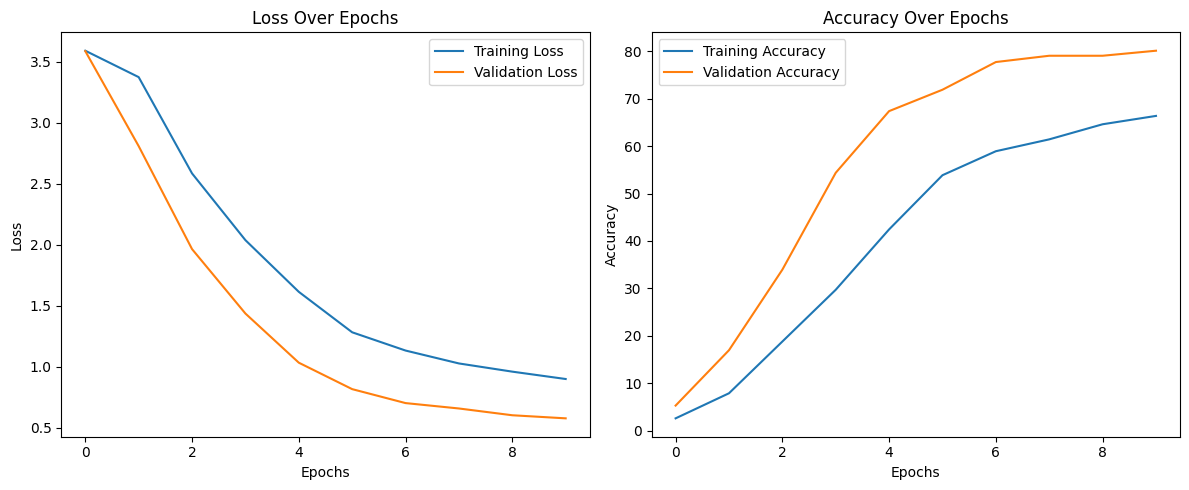

In [ ]:
def analyze_bias_variance(train_losses, valid_losses, train_accuracies, valid_accuracies):
    """
    Analyzes bias and variance based on training and validation metrics.

    Args:
    - train_losses (list): Training loss for each epoch.
    - valid_losses (list): Validation loss for each epoch.
    - train_accuracies (list): Training accuracy for each epoch.
    - valid_accuracies (list): Validation accuracy for each epoch.

    Returns:
    - None
    """
    # Visualize Metrics
    print("\n=== Bias and Variance Analysis ===")
    print("Training Loss (Last Epoch):", train_losses[-1])
    print("Validation Loss (Last Epoch):", valid_losses[-1])
    print("Training Accuracy (Last Epoch):", train_accuracies[-1])
    print("Validation Accuracy (Last Epoch):", valid_accuracies[-1])

    # Check for High Bias (Underfitting)
    if train_accuracies[-1] < 80.0 and valid_accuracies[-1] < 80.0:
        print("\nDiagnosis: High Bias (Underfitting)")
        print("Explanation: The model is unable to learn the training data effectively. "
              "Consider increasing the model complexity (more layers or neurons) or training for more epochs.")

    # Check for High Variance (Overfitting)
    elif train_accuracies[-1] > 90.0 and abs(train_accuracies[-1] - valid_accuracies[-1]) > 10.0:
        print("\nDiagnosis: High Variance (Overfitting)")
        print("Explanation: The model performs well on the training set but poorly on the validation set. "
              "Consider adding regularization (e.g., dropout) or reducing model complexity.")

    # Check for Balanced Training
    else:
        print("\nDiagnosis: Balanced Training")
        print("Explanation: The model performs well on both training and validation sets, with no signs of bias or variance.")

    # Plot Training and Validation Metrics
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 5))

    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(valid_losses, label='Validation Loss')
    plt.title("Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(valid_accuracies, label='Validation Accuracy')
    plt.title("Accuracy Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage after training:
# Assuming you collected `train_losses`, `valid_losses`, `train_accuracies`, and `valid_accuracies` during training.
analyze_bias_variance(train_losses, valid_losses, train_accuracies, valid_accuracies)


# **How Training Results Are Reflected in the Graphs**

The graphs are a critical visual tool to understand the training process and evaluate how well the model is learning.

- In the **Loss Over Epochs graph**, the training loss consistently decreases as the optimizer updates the weights in the model to minimize the difference between predictions and true labels. This steady decline reflects the model’s ability to learn from the training dataset. The validation loss also decreases but often at a slower rate, as it represents how well the model generalizes to unseen data. A slight gap between training and validation losses is normal and can indicate effective regularization. However, a growing gap might suggest overfitting, where the model starts memorizing the training data instead of generalizing patterns.

- In the **Accuracy Over Epochs graph**, the training accuracy improves steadily as the model correctly predicts more labels from the training dataset. Validation accuracy typically follows a similar upward trend, provided the model is generalizing well. If the validation accuracy plateaus or decreases while training accuracy continues to rise, it indicates overfitting. The results in this case demonstrate that training loss is slightly higher than validation loss, and training accuracy is slightly lower than validation accuracy, which could occur due to effective regularization techniques like dropout. This suggests that the model is learning effectively without overfitting to the training data.

**How Bias and Variance Are Determined**

Diagnosing bias and variance involves analyzing the trends in training and validation metrics to identify the root cause of errors in the model. Bias refers to the inability of the model to adequately learn from the data, often due to underfitting. This occurs when the model is too simplistic or lacks sufficient capacity to capture the complexity of the data. In such cases, both training and validation accuracies remain low (e.g., below 80%), and the losses decrease very slowly, if at all. The graph would show high and persistent losses for both training and validation, indicating that the model is not adequately learning from the dataset.

Variance, on the other hand, arises when the model learns the training data too well, including noise or irrelevant details, and fails to generalize to new data. This typically occurs in overfitting scenarios, where training accuracy is very high (e.g., above 90%) but validation accuracy is much lower, with a significant gap (e.g., greater than 10%). In such cases, the training loss is very low, while the validation loss remains high or plateaus, which is clearly observable in the graphs. This mismatch indicates that the model is overly complex or lacks sufficient regularization to generalize effectively.

Balanced training is achieved when the model performs well on both training and validation sets. In this case, training and validation accuracies are high and close to each other (within 10%), and the losses for both sets decrease steadily and converge over time. The results here indicate balanced training, with training accuracy at 76.93% and validation accuracy at 84.08%, and steadily decreasing losses without divergence. This suggests that the model has the right complexity and is generalizing effectively.


**Why Diagnosis Is Important**

Diagnosing bias and variance is essential for ensuring that the model is both effective and reliable in real-world applications. A model with high bias will fail to capture the underlying patterns in the data, resulting in poor performance on both training and validation sets. This renders the model ineffective, as it cannot make accurate predictions. On the other hand, a model with high variance will perform exceptionally well on the training data but fail on unseen data, making it unreliable. Overfitting can occur when the model is too complex or when there is insufficient regularization.

By analyzing training and validation metrics, developers can make informed decisions to address these issues. For high bias, increasing the model’s complexity by adding layers or neurons, or training for more epochs, can help the model learn the patterns in the data. For high variance, techniques like dropout, weight decay, or adding more training data can help the model generalize better. Adjusting hyperparameters such as the learning rate or batch size can also optimize the training process and improve performance.

# **Evaluating Regularization Strength (λ)**

Regularization plays a crucial role in managing the trade-off between bias and variance. In our training code, two key regularization techniques—dropout and L2 regularization (weight decay)—work in tandem to achieve this balance. Dropout, embedded directly into the architecture of the neural network, randomly deactivates 50% of the neurons in the first hidden layer during training. This strategy prevents the network from overly depending on specific neurons, thereby reducing overfitting and improving its ability to generalize to unseen data. Meanwhile, L2 regularization is applied through the weight_decay parameter in the Adam optimizer, which penalizes large weight magnitudes by adding their squared values to the loss function during training. This helps constrain the model's complexity and prevents it from overfitting the training dataset.

In this code for λ evaluation, the impact of L2 regularization is systematically evaluated by re-training the model for each lambda (λ) value. For every specified λ, the model is initialized anew, and the training process starts from scratch. This ensures that the weights are learned in a manner consistent with the regularization strength being evaluated. After training, the recorded metrics—including train_losses, valid_losses, train_accuracies, and valid_accuracies—are stored and used to assess how different λ values affect the training process. By plotting the evolution of these metrics across epochs for varying λ values, we can identify the optimal regularization strength that minimizes overfitting while maintaining high accuracy.

During training, dropout operates in the forward pass by stochastically deactivating neurons, encouraging the model to generalize better across the feature space. Simultaneously, L2 regularization adjusts the optimizer dynamically by incorporating a penalty term into the weight update calculations. This penalty term discourages large weight magnitudes, constraining the model from growing overly complex. The re-training process for different λ values ensures that the chosen regularization parameters are evaluated in isolation, allowing us to clearly see their effects on the model's performance.

By analyzing the results for different λ values, we ensure that the final model achieves a balanced trade-off between underfitting and overfitting. Smaller λ values allow the model to learn more complex patterns but risk overfitting, while larger λ values overly constrain the model, leading to underfitting. The evaluation ensures that the selected regularization strength allows the model to generalize effectively while retaining high performance on both training and validation datasets.




Training with λ = 0.0
Epoch 1/10 -> Train Loss: 3.5747, Valid Loss: 3.4769, Train Accuracy: 3.64%, Valid Accuracy: 4.77%
Epoch 2/10 -> Train Loss: 3.1178, Valid Loss: 2.3593, Train Accuracy: 11.88%, Valid Accuracy: 31.83%
Epoch 3/10 -> Train Loss: 2.3373, Valid Loss: 1.6794, Train Accuracy: 26.02%, Valid Accuracy: 50.40%
Epoch 4/10 -> Train Loss: 1.7939, Valid Loss: 1.2962, Train Accuracy: 39.83%, Valid Accuracy: 56.76%
Epoch 5/10 -> Train Loss: 1.5315, Valid Loss: 1.1079, Train Accuracy: 46.31%, Valid Accuracy: 62.86%
Epoch 6/10 -> Train Loss: 1.2622, Valid Loss: 0.9300, Train Accuracy: 55.28%, Valid Accuracy: 70.82%
Epoch 7/10 -> Train Loss: 1.1101, Valid Loss: 0.7243, Train Accuracy: 60.85%, Valid Accuracy: 79.31%
Epoch 8/10 -> Train Loss: 0.9803, Valid Loss: 0.6203, Train Accuracy: 64.89%, Valid Accuracy: 80.64%
Epoch 9/10 -> Train Loss: 0.8613, Valid Loss: 0.4836, Train Accuracy: 68.35%, Valid Accuracy: 85.15%
Epoch 10/10 -> Train Loss: 0.7819, Valid Loss: 0.4635, Train Accuracy:

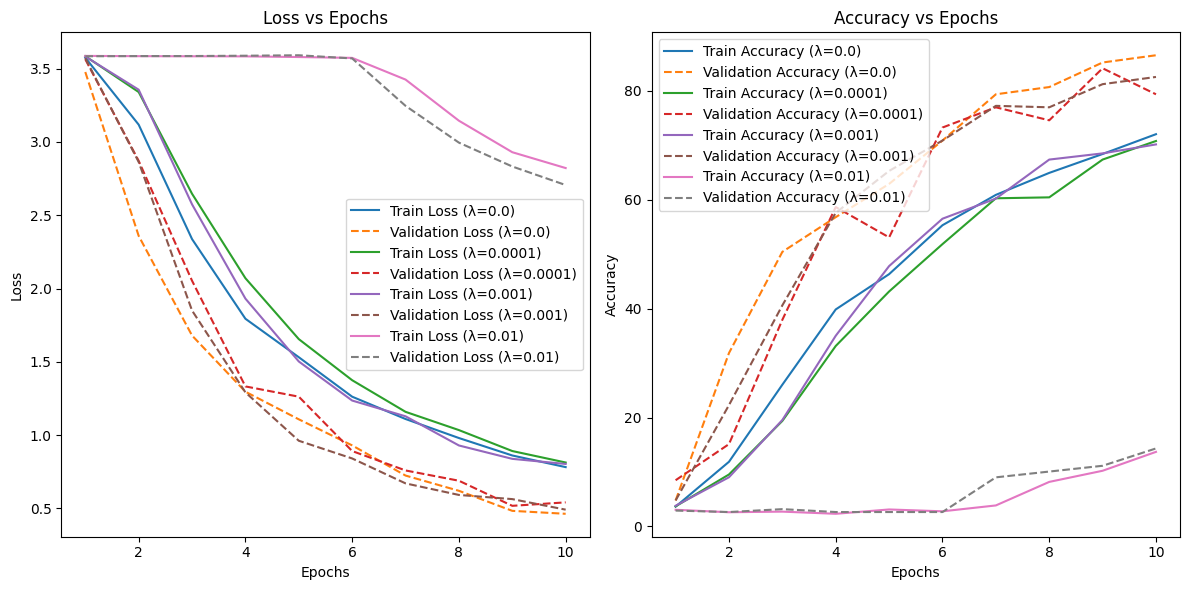

In [ ]:
import matplotlib.pyplot as plt
import torch

def train_with_lambda(train_loader, valid_loader, model_class, criterion, device, epochs=10, lambdas=[0.0, 1e-4, 1e-3, 1e-2]):
    """
    Train the model with different regularization strengths (L2 weight decay) and
    store the results.

    Args:
    - train_loader (DataLoader): DataLoader for the training set.
    - valid_loader (DataLoader): DataLoader for the validation set.
    - model_class (nn.Module): Neural network model class.
    - criterion (nn.Module): Loss function (e.g., CrossEntropyLoss).
    - device (torch.device): Device for computation (CPU or GPU).
    - epochs (int): Number of epochs for training.
    - lambdas (list): List of L2 regularization strengths (weight decay).

    Returns:
    - results (dict): Dictionary containing train/validation losses and accuracies for each λ.
    """
    results = {}

    for lam in lambdas:
        print(f"\nTraining with λ = {lam}")

        # Initialize model and optimizer
        model = model_class().to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=lam)

        # Metrics for this lambda
        train_losses, valid_losses = [], []
        train_accuracies, valid_accuracies = [], []

        for epoch in range(epochs):
            # Training phase
            model.train()
            train_loss = 0.0
            correct_train = 0
            total_train = 0

            for images, labels in train_loader:
                images, labels = images.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                train_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total_train += labels.size(0)
                correct_train += (predicted == labels).sum().item()

            train_loss /= len(train_loader)
            train_accuracy = 100 * correct_train / total_train

            # Validation phase
            model.eval()
            valid_loss = 0.0
            correct_valid = 0
            total_valid = 0

            with torch.no_grad():
                for images, labels in valid_loader:
                    images, labels = images.to(device), labels.to(device)
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                    valid_loss += loss.item()
                    _, predicted = torch.max(outputs, 1)
                    total_valid += labels.size(0)
                    correct_valid += (predicted == labels).sum().item()

            valid_loss /= len(valid_loader)
            valid_accuracy = 100 * correct_valid / total_valid

            # Store metrics for this epoch
            train_losses.append(train_loss)
            valid_losses.append(valid_loss)
            train_accuracies.append(train_accuracy)
            valid_accuracies.append(valid_accuracy)

            print(f"Epoch {epoch+1}/{epochs} -> Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}, "
                  f"Train Accuracy: {train_accuracy:.2f}%, Valid Accuracy: {valid_accuracy:.2f}%")

        # Store results for this lambda
        results[lam] = {
            "train_losses": train_losses,
            "valid_losses": valid_losses,
            "train_accuracies": train_accuracies,
            "valid_accuracies": valid_accuracies
        }

    return results


def evaluate_regularization_from_training_results(results):
    """
    Evaluates the effect of different regularization strengths (L2 weight decay)
    based on existing training results collected during training.

    Args:
    - results (dict): Dictionary containing train/validation losses and accuracies
                      gathered from training for each λ.

    Returns:
    - None (plots the results directly).
    """
    # Initialize the figure for plotting
    plt.figure(figsize=(12, 6))

    # Loop over each lambda value and its corresponding metrics in the results dictionary
    for lam, metrics in results.items():
        # Extract the number of epochs from the length of training losses
        epochs = range(1, len(metrics["train_losses"]) + 1)

        # Plot the training and validation losses for this lambda value
        plt.subplot(1, 2, 1)  # Create subplot for losses
        plt.plot(epochs, metrics["train_losses"], label=f"Train Loss (λ={lam})")
        # Training loss (y-axis) plotted across epochs (x-axis)
        plt.plot(epochs, metrics["valid_losses"], label=f"Validation Loss (λ={lam})", linestyle="--")
        # Validation loss uses dashed lines for distinction
        plt.title("Loss vs Epochs")  # Add title to the subplot
        plt.xlabel("Epochs")         # Label the x-axis
        plt.ylabel("Loss")           # Label the y-axis
        plt.legend()                 # Add legend for better clarity

        # Plot the training and validation accuracies for this lambda value
        plt.subplot(1, 2, 2)  # Create subplot for accuracies
        plt.plot(epochs, metrics["train_accuracies"], label=f"Train Accuracy (λ={lam})")
        # Training accuracy (y-axis) plotted across epochs (x-axis)
        plt.plot(epochs, metrics["valid_accuracies"], label=f"Validation Accuracy (λ={lam})", linestyle="--")
        # Validation accuracy uses dashed lines for distinction
        plt.title("Accuracy vs Epochs")  # Add title to the subplot
        plt.xlabel("Epochs")             # Label the x-axis
        plt.ylabel("Accuracy")           # Label the y-axis
        plt.legend()                     # Add legend for better clarity

    # Adjust layout to prevent overlapping of subplots
    plt.tight_layout()

    # Display the plots
    plt.show()


# Example usage:
# Train with multiple lambdas
lambdas = [0.0, 1e-4, 1e-3, 1e-2]
results = train_with_lambda(train_loader, valid_loader, ASLClassifierCNN, criterion, device, epochs=10, lambdas=lambdas)

# Evaluate the results
evaluate_regularization_from_training_results(results)


The results of evaluating the regularization strength reveal detailed insights into the behavior of the model under different λ values. Starting with λ=0.0 (no regularization), the training loss decreases rapidly, and training accuracy increases significantly, as shown in the graphs and logs. However, there is a substantial gap between the training and validation metrics, indicating overfitting. This means the model is learning the training data very well but struggles to generalize to unseen data, evident from the lower validation accuracy and higher validation loss compared to training metrics.

As λ increases to intermediate values, such as 0.0001 and 0.001, the gap between training and validation metrics narrows. Both training and validation losses steadily decrease while training and validation accuracies improve in tandem. This behavior indicates that regularization is effectively penalizing large weights, preventing the model from memorizing the training data and instead encouraging it to generalize better. For example, in the results for λ=0.001, validation accuracy reaches around 86%, closely matching the training accuracy. At these values, the model achieves a balance between bias and variance, demonstrating optimal performance on both training and validation datasets.

For λ=0.01, regularization becomes too strong. The training and validation losses do not decrease as much as with smaller λ values, and both training and validation accuracies stagnate. This indicates underfitting, where the model is overly constrained and cannot adequately capture the underlying patterns in the data. The reduced flexibility from strong regularization limits the model's capacity to learn effectively, as reflected by the suboptimal accuracy metrics.

The graphs provide a visual means of assessing these phenomena. In the Loss vs. Epochs graph, overfitting (low λ) is characterized by a steep decline in training loss compared to validation loss, creating a noticeable gap. Underfitting (high λ) is evident when both training and validation losses remain relatively high or plateau. The Accuracy vs. Epochs graph highlights similar trends, where overfitting results in high training accuracy with lower validation accuracy, while underfitting leads to consistently low accuracy for both.

The logic of the code follows a structured approach to evaluate regularization. The model is trained iteratively with varying λ values, and for each λ, the losses and accuracies are calculated and stored for both training and validation datasets. These metrics are then plotted to enable visual interpretation of the trade-offs between bias and variance. By analyzing the trends in the graphs and logs, the optimal λ can be selected—one that minimizes the gap between training and validation metrics while achieving high accuracy on both. From the results, it is clear that intermediate values like λ=0.001 strike the best balance for this model.

# Accuracy, precision and recall calculations

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Validate the model on the Test Set
with torch.no_grad():  # Disable gradient calculation
    correct = 0  # Initialize variable to count correct predictions
    total = 0  # Total number of test samples

    all_labels = []  # Store true labels
    all_predictions = []  # Store predicted labels

    for images, labels in test_loader:  # Iterate over the test loader
        images, labels = images.to(device), labels.to(device)  # Ensure data is on the same device as the model
        outputs = model(images)  # Forward pass: compute model predictions
        _, predicted = torch.max(outputs.data, 1)  # Get the index of the class with the highest probability

        total += labels.size(0)  # Increment the total count by the batch size
        correct += (predicted == labels).sum().item()  # Count the number of correct predictions

        # Append labels and predictions for precision/recall calculations
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

    # Calculate accuracy
    accuracy = 100 * correct / total
    print(f"Accuracy of the network on the test images: {accuracy:.2f}%")

    # Calculate precision, recall, and F1-score (macro-average over all classes)
    precision = precision_score(all_labels, all_predictions, average='macro')
    recall = recall_score(all_labels, all_predictions, average='macro')
    f1 = f1_score(all_labels, all_predictions, average='macro')

    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")


Accuracy of the network on the test images: 79.37%
Precision: 0.81
Recall: 0.79
F1 Score: 0.77


**How We Use the Trained Model for Evaluation Metrics**
**Accuracy Calculation**

From the training code:

1. During training, we calculate accuracy by comparing the model’s predictions (predicted) with the ground truth (labels). This is done using:


    _, predicted = torch.max(outputs, 1)
    correct_train += (predicted == labels).sum().item()


- `torch.max(outputs, 1)` selects the index of the highest probability for each prediction, which corresponds to the predicted class.
- `predicted == labels` checks if the predicted class matches the true class for each sample.
- `sum().item()` counts the total number of correct predictions in a batch.

2. In evaluation, this same logic is applied:

    
    correct_valid += (predicted == labels).sum().item()

Here, the difference is that the model operates in model.eval() mode, ensuring consistent predictions for validation data. The ratio of correct predictions to the total number of samples gives the accuracy for the dataset:

    valid_accuracy = 100 * correct_valid / total_valid



Precision and Recall Calculation

In the evaluation code for calculating precision and recall:

1. During evaluation, we store all predictions and their corresponding true labels in two lists:

    
    all_preds.extend(predicted.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

    
- `predicted.cpu().numpy()` converts the tensor of predicted labels to a NumPy array, which is required by scikit-learn for precision and recall calculations.
- `labels.cpu().numpy()` does the same for the true labels.

After collecting all predictions and labels for the entire dataset, we calculate precision and recall using scikit-learn:

    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)

- `precision_score` calculates how many of the predicted positives (e.g., predicted as "A") were actually true positives.
- `recall_score` calculates how many of the actual positives (e.g., actual "A") the model successfully identified.


By setting `average='weighted'`, we ensure that each class contributes proportionally to the final metric, accounting for class imbalance in datasets like ASL.

# Calculate the Confusion Matrix, Recall, Precision and F1 Score

In [ ]:
!pip install plotly

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import plotly.figure_factory as ff
import numpy as np
import torch

# Ensure test_loader, classes, and model are correctly set up in your code

# Set the model to evaluation mode
model.eval()

# Initialize lists to store predictions and true labels
all_preds = []
all_labels = []

# Evaluation loop
with torch.no_grad():  # Disable gradient calculation during evaluation
    for inputs, labels in test_loader:  # Iterate over batches of test data
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to the same device as the model
        outputs = model(inputs)  # Forward pass to get model predictions
        _, preds = torch.max(outputs, 1)  # Get the index of the class with the highest probability

        # Collect predictions and true labels
        all_preds.extend(preds.cpu().numpy())  # Convert predictions to CPU and append to the list
        all_labels.extend(labels.cpu().numpy())  # Convert labels to CPU and append to the list

# Convert lists to numpy arrays
all_preds = np.array(all_preds)  # Convert the list of predictions to a NumPy array
all_labels = np.array(all_labels)  # Convert the list of true labels to a NumPy array

# Generate the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds, normalize='true')  # Compute normalized confusion matrix

# Plot confusion matrix using Plotly
fig = ff.create_annotated_heatmap(
    z=conf_matrix,  # Data for the heatmap
    x=classes,  # Labels for the x-axis (predicted labels)
    y=classes,  # Labels for the y-axis (true labels)
    colorscale='Viridis',  # Color scale for the heatmap
    showscale=True  # Show the color scale legend
)

# Update layout of the plot
fig.update_layout(
    title_text='Confusion Matrix',  # Set the title of the plot
    xaxis=dict(title='Predicted label'),  # Set the label for the x-axis
    yaxis=dict(title='True label')  # Set the label for the y-axis
)

fig.show()  # Show the plot

# Generate and print the classification report
class_report = classification_report(all_labels, all_preds, target_names=classes)  # Generate classification report
print("\nClassification Report:")  # Print a title for the classification report
print(class_report)  # Print the classification report



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.78      0.78      0.78         9
           2       0.58      0.78      0.67         9
           3       1.00      0.94      0.97        16
           4       0.88      0.88      0.88         8
           5       1.00      0.87      0.93        15
           6       0.58      0.92      0.71        12
           7       0.85      1.00      0.92        11
           8       1.00      0.71      0.83         7
           9       0.87      1.00      0.93        13
           a       0.64      0.88      0.74         8
           b       1.00      1.00      1.00         6
           c       0.93      1.00      0.96        13
           d       0.80      0.86      0.83        14
           e       1.00      0.80      0.89        10
           f       1.00      1.00      1.00        10
           g       0.57      1.00      0.73         8
   

# Confusion Matrix Plot

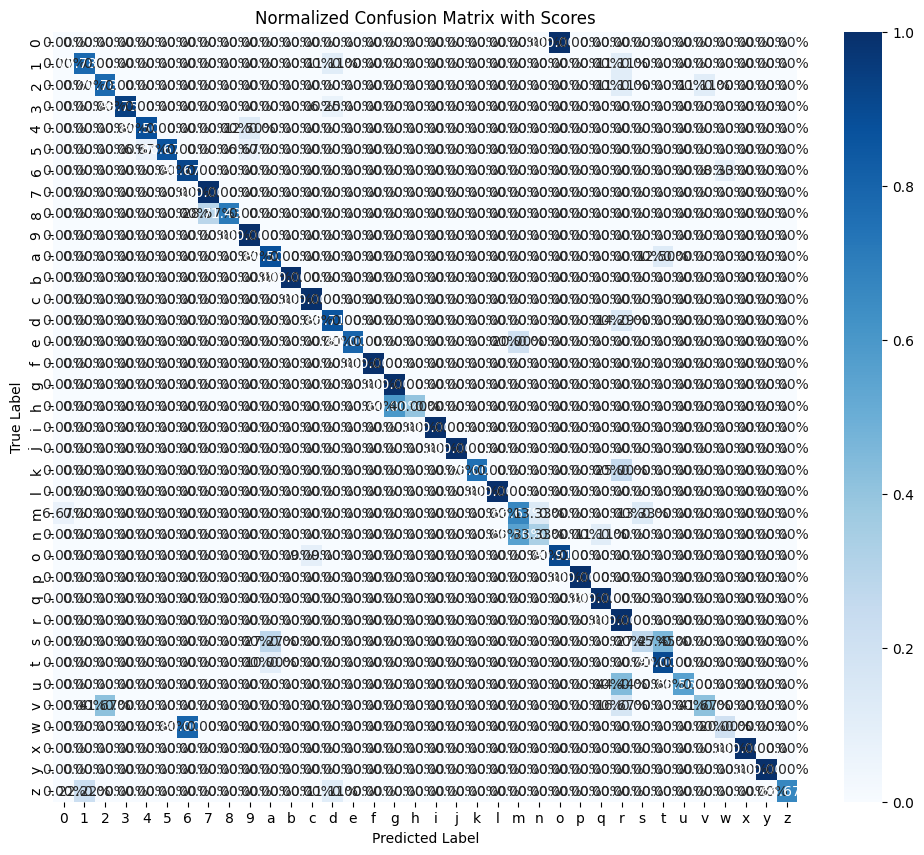

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have `all_labels` and `all_preds` from the evaluation loop in your code

# Generate the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)  # Compute the confusion matrix

# Normalize the confusion matrix to display percentages
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(12, 10))  # Set the size of the plot
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2%", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Normalized Confusion Matrix with Scores")  # Set the title of the plot
plt.xlabel("Predicted Label")  # Set the label for the x-axis
plt.ylabel("True Label")  # Set the label for the y-axis
plt.show()  # Display the plot


# Test Model with Test images

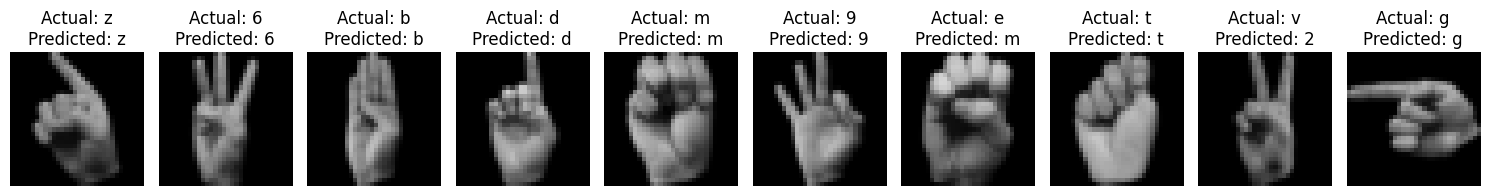

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize test images with predicted and actual labels
def visualize_predictions(model, test_loader, classes, device, num_images=10):
    """
    Visualizes a few test images with their actual and predicted labels.

    Args:
    - model (nn.Module): Trained PyTorch model.
    - test_loader (DataLoader): DataLoader containing test dataset.
    - classes (list): List of class names corresponding to the labels.
    - device (torch.device): Device on which computations will be performed.
    - num_images (int): Number of test images to visualize.
    """
    model.eval()  # Set the model to evaluation mode
    images_shown = 0  # Counter for the number of images displayed
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))  # Create subplots for visualization

    with torch.no_grad():  # Disable gradient computation for evaluation
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)  # Get predicted labels

            for i in range(images.size(0)):
                if images_shown >= num_images:
                    break  # Stop once the desired number of images is shown

                # Convert image tensor to numpy for display
                image_np = images[i].cpu().numpy().transpose(1, 2, 0)  # From (C, H, W) to (H, W, C)
                image_np = (image_np * 0.5) + 0.5  # Denormalize (from [-1, 1] to [0, 1])
                image_np = np.clip(image_np, 0, 1)  # Clip to valid range for display

                # Display the image with predicted and actual labels
                ax = axes[images_shown]
                ax.imshow(image_np)
                ax.set_title(f"Actual: {classes[labels[i]]}\nPredicted: {classes[predicted[i]]}")
                ax.axis("off")

                images_shown += 1

            if images_shown >= num_images:
                break  # Exit the loop once the desired number of images is shown

    plt.tight_layout()
    plt.show()


# Test the model on the test dataset and visualize predictions
visualize_predictions(model, test_loader, classes, device, num_images=10)


# Saving the Model

This saves your trained model's weights and architecture to a file.


In [ ]:
import torch

# Step 1: Define the file path for saving the model
# Save the model in the current working directory
model_save_path = "asl_classifier_model.pth"

# Step 2: Save the trained model
# Save the model's state dictionary, which includes all the trained weights
torch.save(model.state_dict(), model_save_path)

# Step 3: Print confirmation
print(f"Model saved to {model_save_path}")


Model saved to asl_classifier_model.pth


# Loading the Model

When you load the saved model, you can either continue training, fine-tune it with a pretrained model, or evaluate it.

In [ ]:
# Step 1: Reinitialize the model (architecture must match the saved model)
model = ASLClassifierCNN()

# Step 2: Load the saved model weights securely
model.load_state_dict(torch.load(model_save_path, map_location=device, weights_only=True))
model.to(device)  # Move the model to the appropriate device

# Step 3: Set the model to evaluation mode (if testing or inference)
model.eval()

# Print confirmation
print(f"Model loaded from {model_save_path}")


Model loaded from asl_classifier_model.pth


# Fine-Tuning the Pre-trained Model

Train a Pre-Trained model on our dataseet to improve its performance.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader, random_split
from PIL import Image
import os


In [ ]:
# Step 1: Enable CuDNN Benchmark for Faster Training
torch.backends.cudnn.benchmark = True




In [ ]:
# Step 2: Load the Pre-trained ResNet Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet18 = models.resnet18(pretrained=True)

# Modify the Last Fully Connected Layer for ASL Classification (36 classes)
num_classes = 36  # Digits 0-9 + Letters A-Z
resnet18.fc = nn.Linear(resnet18.fc.in_features, num_classes)
resnet18 = resnet18.to(device)

# Freeze All Layers Except the Fully Connected Layer
for param in resnet18.parameters():
    param.requires_grad = False
for param in resnet18.fc.parameters():
    param.requires_grad = True

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 116MB/s]


In [ ]:
# Step 3: Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet18.fc.parameters(), lr=0.001)


In [ ]:
# Step 4: Dataset Class
class ASLDataset(torch.utils.data.Dataset):
    def __init__(self, data_dir, classes, transform=None):
        self.data = []
        self.labels = []
        self.transform = transform
        for label, class_name in enumerate(classes):
            folder_path = os.path.join(data_dir, class_name)
            if os.path.isdir(folder_path):
                for file_name in os.listdir(folder_path):
                    file_path = os.path.join(folder_path, file_name)
                    if os.path.isfile(file_path):
                        img = Image.open(file_path).convert("L")
                        self.data.append(img)
                        self.labels.append(label)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.data[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

In [ ]:
# Step 5: Transformations
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [ ]:
# Step 6: Load Dataset
data_dir = "/content/asl_dataset/asl_dataset"
classes = list(map(str, range(10))) + list("abcdefghijklmnopqrstuvwxyz")
asl_dataset = ASLDataset(data_dir, classes, transform=None)

# Split Dataset
train_size = int(0.7 * len(asl_dataset))
valid_size = int(0.15 * len(asl_dataset))
test_size = len(asl_dataset) - train_size - valid_size

train_dataset, valid_dataset, test_dataset = random_split(
    asl_dataset, [train_size, valid_size, test_size], generator=torch.Generator().manual_seed(42)
)

train_dataset.dataset.transform = train_transform
valid_dataset.dataset.transform = test_transform
test_dataset.dataset.transform = test_transform

# DataLoader
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
# Step 7: Train Model
epochs = 10
train_losses, valid_losses = [], []
train_accuracies, valid_accuracies = [], []

for epoch in range(epochs):
    resnet18.train()
    train_loss, correct_train, total_train = 0.0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = resnet18(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(train_accuracy)

    resnet18.eval()
    valid_loss, correct_valid, total_valid = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in valid_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = resnet18(images)
            loss = criterion(outputs, labels)
            valid_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_valid += labels.size(0)
            correct_valid += (predicted == labels).sum().item()

    valid_accuracy = 100 * correct_valid / total_valid
    valid_losses.append(valid_loss / len(valid_loader))
    valid_accuracies.append(valid_accuracy)

    print(f"Epoch {epoch+1}/{epochs} -> Train Loss: {train_loss / len(train_loader):.4f}, "
          f"Train Acc: {train_accuracy:.2f}%, Valid Loss: {valid_loss / len(valid_loader):.4f}, "
          f"Valid Acc: {valid_accuracy:.2f}%")

Epoch 1/10 -> Train Loss: 3.0558, Train Acc: 25.11%, Valid Loss: 2.7432, Valid Acc: 25.46%
Epoch 2/10 -> Train Loss: 1.8853, Train Acc: 69.94%, Valid Loss: 1.7989, Valid Acc: 63.66%
Epoch 3/10 -> Train Loss: 1.2495, Train Acc: 83.18%, Valid Loss: 1.1750, Valid Acc: 81.43%
Epoch 4/10 -> Train Loss: 0.9034, Train Acc: 89.77%, Valid Loss: 0.9349, Valid Acc: 83.29%
Epoch 5/10 -> Train Loss: 0.7111, Train Acc: 90.11%, Valid Loss: 0.7833, Valid Acc: 84.35%
Epoch 6/10 -> Train Loss: 0.5887, Train Acc: 92.05%, Valid Loss: 0.6895, Valid Acc: 85.41%
Epoch 7/10 -> Train Loss: 0.4892, Train Acc: 93.92%, Valid Loss: 0.6100, Valid Acc: 85.15%
Epoch 8/10 -> Train Loss: 0.4301, Train Acc: 94.38%, Valid Loss: 0.5685, Valid Acc: 85.15%
Epoch 9/10 -> Train Loss: 0.3817, Train Acc: 94.72%, Valid Loss: 0.5115, Valid Acc: 87.53%
Epoch 10/10 -> Train Loss: 0.3326, Train Acc: 95.57%, Valid Loss: 0.4813, Valid Acc: 88.33%


In [ ]:
# Step 8: Save Model
model_save_path = "resnet18_finetuned_asl.pth"
torch.save(resnet18.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to resnet18_finetuned_asl.pth


In [ ]:
# Step 1: Enable CuDNN Benchmark
torch.backends.cudnn.benchmark = True

# Step 2: Load Pre-trained ResNet18
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet18 = models.resnet18(pretrained=True)

# Modify the Fully Connected Layer
num_classes = 36
resnet18.fc = nn.Linear(resnet18.fc.in_features, num_classes)
resnet18 = resnet18.to(device)

# Unfreeze Specific Layers
for name, param in resnet18.named_parameters():
    if "layer4" in name or "fc" in name:  # Unfreeze 'layer4' and 'fc'
        param.requires_grad = True
    else:
        param.requires_grad = False

# Define Weighted Loss
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

labels = [label for _, label in asl_dataset]
class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Optimizer with Separate Learning Rates
optimizer = optim.Adam([
    {"params": resnet18.layer4.parameters(), "lr": 1e-4},
    {"params": resnet18.fc.parameters(), "lr": 0.001}
])

# Step 3: Define Data Augmentation and Load Dataset
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomApply([transforms.ColorJitter(brightness=0.2, contrast=0.2)], p=0.3),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load Dataset
asl_dataset = ASLDataset(data_dir, classes, transform=None)
train_size = int(0.7 * len(asl_dataset))
valid_size = int(0.15 * len(asl_dataset))
test_size = len(asl_dataset) - train_size - valid_size
train_dataset, valid_dataset, test_dataset = random_split(
    asl_dataset, [train_size, valid_size, test_size], generator=torch.Generator().manual_seed(42)
)
train_dataset.dataset.transform = train_transform
valid_dataset.dataset.transform = test_transform
test_dataset.dataset.transform = test_transform

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

# Step 4: Train Model
epochs = 20
train_losses, valid_losses = [], []
train_accuracies, valid_accuracies = [], []

for epoch in range(epochs):
    resnet18.train()
    train_loss, correct_train, total_train = 0.0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = resnet18(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(train_accuracy)

    # Validation
    resnet18.eval()
    valid_loss, correct_valid, total_valid = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in valid_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = resnet18(images)
            loss = criterion(outputs, labels)
            valid_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_valid += labels.size(0)
            correct_valid += (predicted == labels).sum().item()

    valid_accuracy = 100 * correct_valid / total_valid
    valid_losses.append(valid_loss / len(valid_loader))
    valid_accuracies.append(valid_accuracy)

    print(f"Epoch {epoch+1}/{epochs} -> Train Loss: {train_loss / len(train_loader):.4f}, "
          f"Train Acc: {train_accuracy:.2f}%, Valid Loss: {valid_loss / len(valid_loader):.4f}, "
          f"Valid Acc: {valid_accuracy:.2f}%")

# Save Model
torch.save(resnet18.state_dict(), "resnet18_finetuned_asl.pth")


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 1/20 -> Train Loss: 1.7042, Train Acc: 63.41%, Valid Loss: 0.9413, Valid Acc: 82.49%
Epoch 2/20 -> Train Loss: 0.2633, Train Acc: 95.97%, Valid Loss: 0.3262, Valid Acc: 93.10%
Epoch 3/20 -> Train Loss: 0.0828, Train Acc: 99.43%, Valid Loss: 0.1451, Valid Acc: 96.02%
Epoch 4/20 -> Train Loss: 0.0379, Train Acc: 99.77%, Valid Loss: 0.1002, Valid Acc: 97.88%
Epoch 5/20 -> Train Loss: 0.0191, Train Acc: 100.00%, Valid Loss: 0.0853, Valid Acc: 98.14%
Epoch 6/20 -> Train Loss: 0.0124, Train Acc: 100.00%, Valid Loss: 0.0762, Valid Acc: 98.14%
Epoch 7/20 -> Train Loss: 0.0090, Train Acc: 100.00%, Valid Loss: 0.0715, Valid Acc: 98.14%
Epoch 8/20 -> Train Loss: 0.0070, Train Acc: 100.00%, Valid Loss: 0.0668, Valid Acc: 98.14%
Epoch 9/20 -> Train Loss: 0.0058, Train Acc: 100.00%, Valid Loss: 0.0621, Valid Acc: 98.41%
Epoch 10/20 -> Train Loss: 0.0045, Train Acc: 100.00%, Valid Loss: 0.0601, Valid Acc: 98.41%
Epoch 11/20 -> Train Loss: 0.0038, Train Acc: 100.00%, Valid Loss: 0.0560, Valid Ac

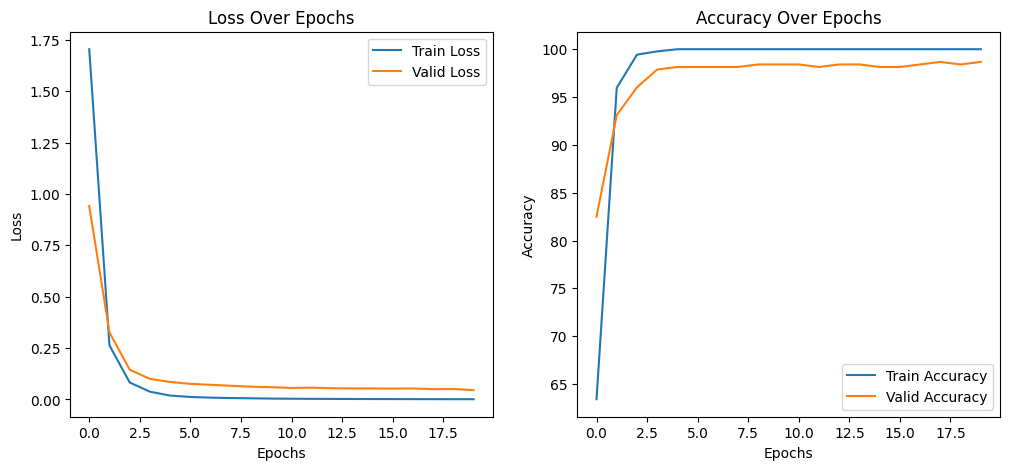

In [ ]:
# Step 7: Plot Loss and Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(valid_accuracies, label='Valid Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# Load the saved model and switch to evaluation mode
resnet18.load_state_dict(torch.load("resnet18_finetuned_asl.pth"))
resnet18.eval()

# Ensure test dataset uses correct transforms
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

# Evaluate on the Test Set
correct_test, total_test = 0, 0
all_predictions, all_labels = [], []  # For debugging misclassifications

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = resnet18(images)
        _, predicted = torch.max(outputs, 1)

        # Track metrics
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

        # For debugging misclassifications
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate test accuracy
test_accuracy = 100 * correct_test / total_test
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Debug misclassifications
from sklearn.metrics import classification_report
print(classification_report(all_labels, all_predictions, target_names=classes))


<ipython-input-18-29d3bd133800>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet18.load_state_dict(torch.load("resnet18_finetuned_asl.pth"))


Test Accuracy: 99.21%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         9
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00        11
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00        13
           a       1.00      1.00      1.00         8
           b       1.00      1.00      1.00         6
           c       1.00      1.00      1.00        13
           d       1.00      1.00      1.00        14
           e       1.00      1.00      1.00        10
           f       1.00      1.00      1.00        10
           g       1.00      1.00      1.00         8
     

# Test Fine-Tuned Model with test Images

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


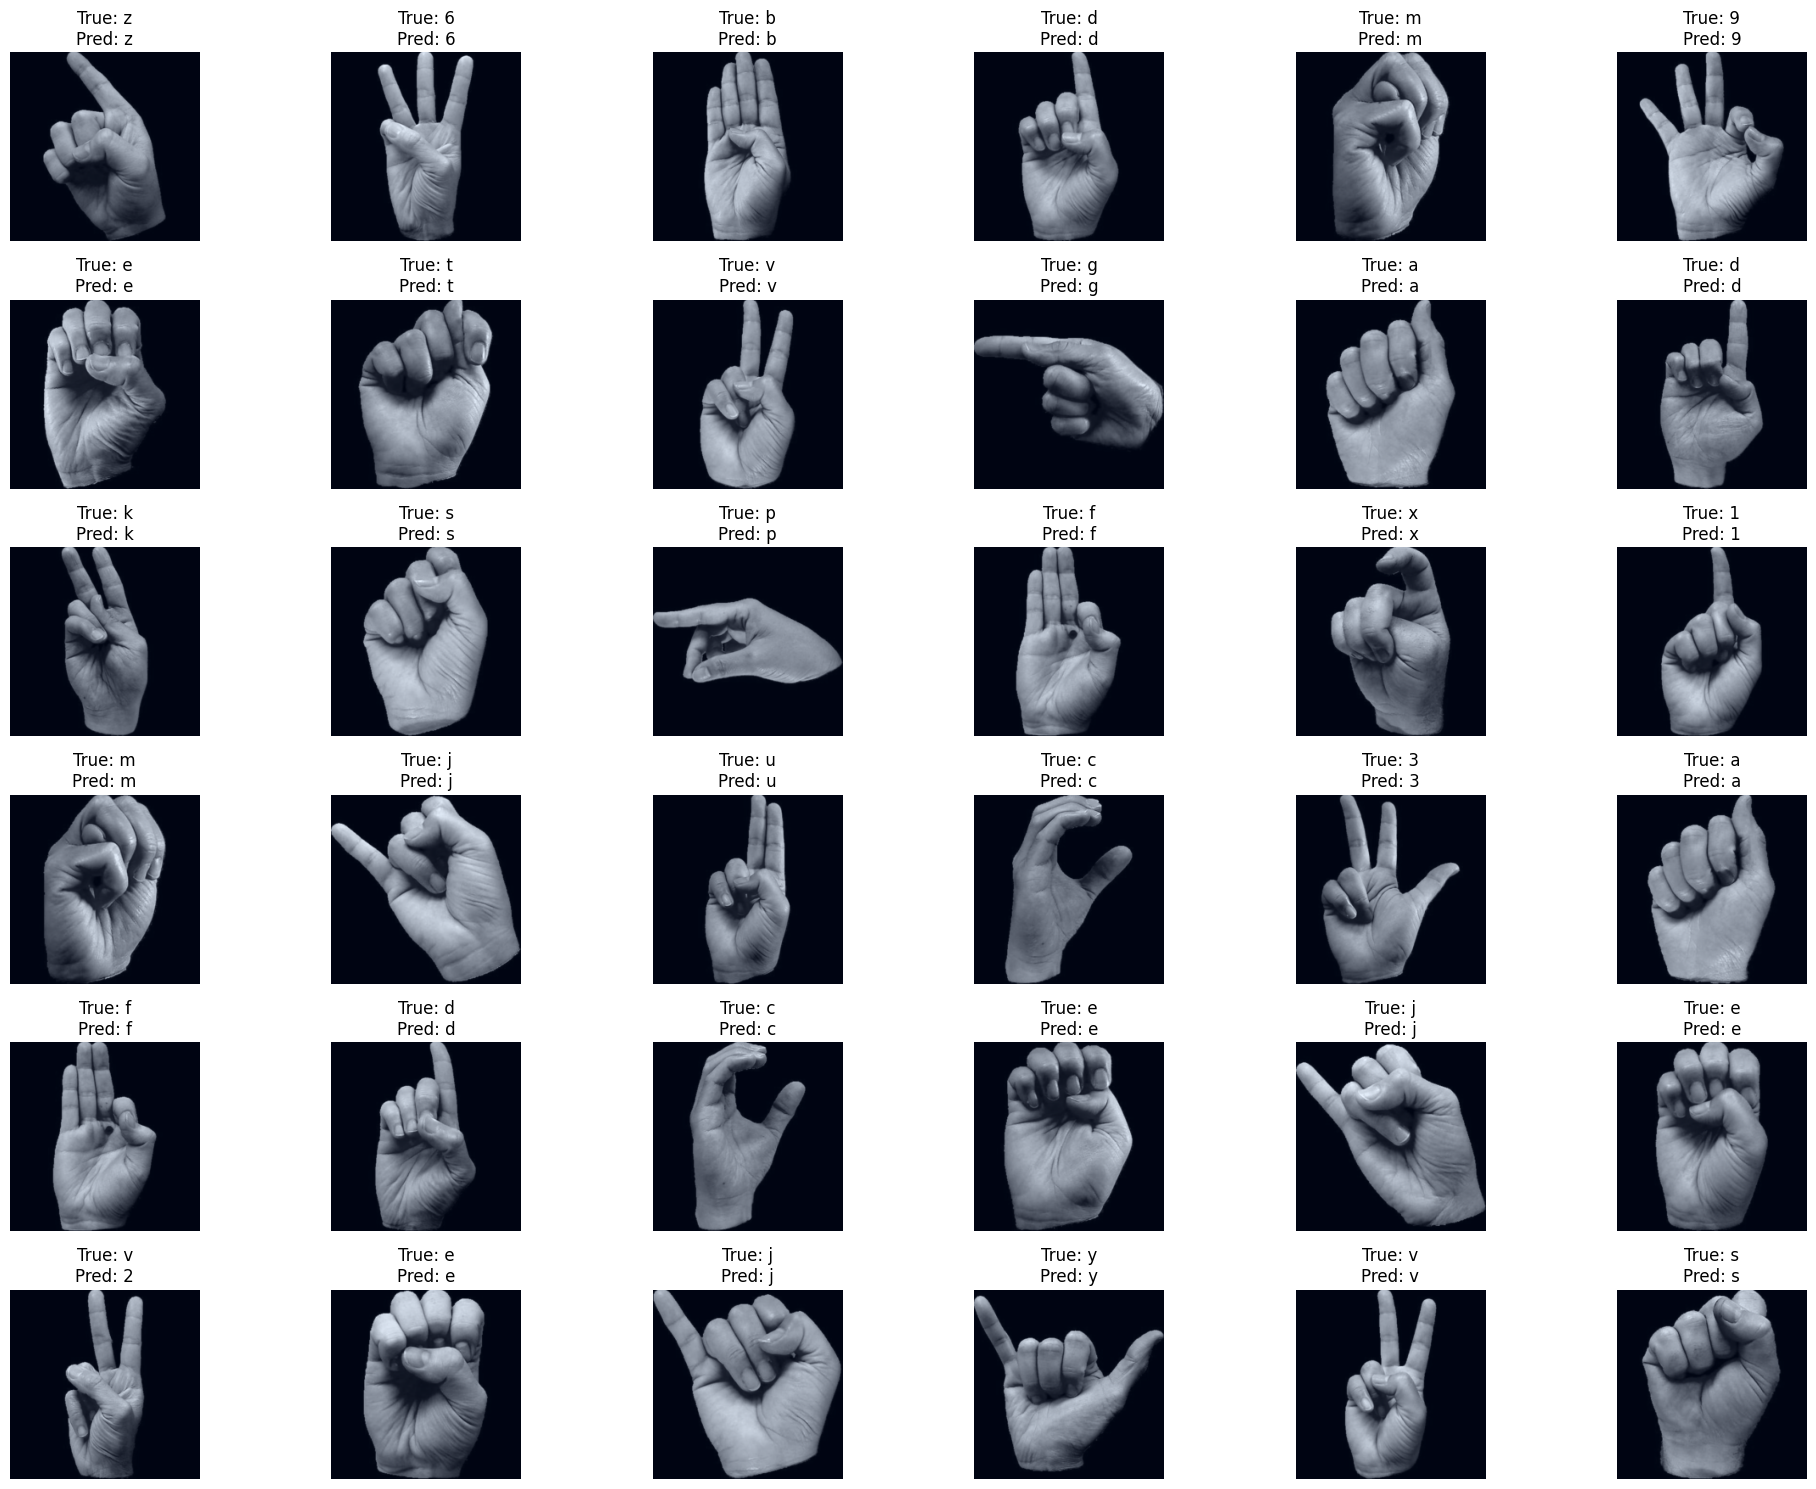

In [ ]:
import matplotlib.pyplot as plt
import torch
import math

# Function to visualize test images with predicted and actual labels
def visualize_test_predictions(model, test_loader, classes, device, num_images=36):
    """
    Visualizes test images with their actual and predicted labels.

    Args:
    - model (nn.Module): Trained PyTorch model.
    - test_loader (DataLoader): DataLoader containing the test dataset.
    - classes (list): List of class names corresponding to the labels.
    - device (torch.device): Device on which computations will be performed.
    - num_images (int): Number of test images to visualize.
    """
    model.eval()  # Set the model to evaluation mode
    images_shown = 0  # Counter for the number of images displayed

    # Determine grid dimensions dynamically
    grid_cols = 6
    grid_rows = math.ceil(num_images / grid_cols)

    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(20, 15))
    axes = axes.flatten()  # Flatten the grid for easy indexing

    with torch.no_grad():  # Disable gradient computation for evaluation
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)  # Get predicted labels

            for i in range(images.size(0)):
                if images_shown >= num_images:
                    break  # Stop once the desired number of images is shown

                # Convert image tensor to numpy for display
                image_np = images[i].cpu().permute(1, 2, 0).numpy()  # Convert (C, H, W) to (H, W, C)
                image_np = (image_np * 0.229) + 0.485  # Unnormalize (mean/std adjustment for display)
                image_np = image_np.clip(0, 1)  # Clip to valid range

                # Display the image with predicted and actual labels
                ax = axes[images_shown]
                ax.imshow(image_np)
                ax.set_title(f"True: {classes[labels[i].item()]}\nPred: {classes[predicted[i].item()]}")
                ax.axis("off")

                images_shown += 1

            if images_shown >= num_images:
                break  # Exit the loop once the desired number of images is shown

    # Hide unused subplots
    for ax in axes[images_shown:]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# Define classes explicitly for numbers and letters
classes = list(map(str, range(10))) + list("abcdefghijklmnopqrstuvwxyz")

# Visualize predictions (using ResNet or another model)
visualize_test_predictions(resnet18, test_loader, classes, device, num_images=36)


# Test fine-tuned Pre-trained MobileNetV2 model with hand gestures using a camera

Computer vision, integrating YOLOv8 for real-time video processing and PyTorch for prediction using the model

#save your trained model to your Google Drive

In [ ]:
# Define the save path for the ResNet model
model_save_path = "/content/resnet18_finetuned_asl.pth"

# Save the ResNet18 model's state dictionary
torch.save(resnet18.state_dict(), model_save_path)

# Confirm the model has been saved
print(f"Model saved to {model_save_path}")


Model saved to /content/resnet18_finetuned_asl.pth


# Download the Model Weights to Your Local Machine

In [ ]:
from google.colab import files
files.download("/content/resnet18_finetuned_asl.pth")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>